<a href="https://colab.research.google.com/github/jagadeep31/Learn-Flow-Task4-Social-Network-Analysis-for-Online-Communities-/blob/main/Social_Network_Analysis_for_Online_Communities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
 # Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
dataset = pd.read_csv('Social_Network_Ads.csv')
print("Dataset_shape:",dataset.shape)

Dataset_shape: (400, 5)


In [3]:
# Select relevant columns for clustering
features = dataset[['Age', 'EstimatedSalary']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [4]:
# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

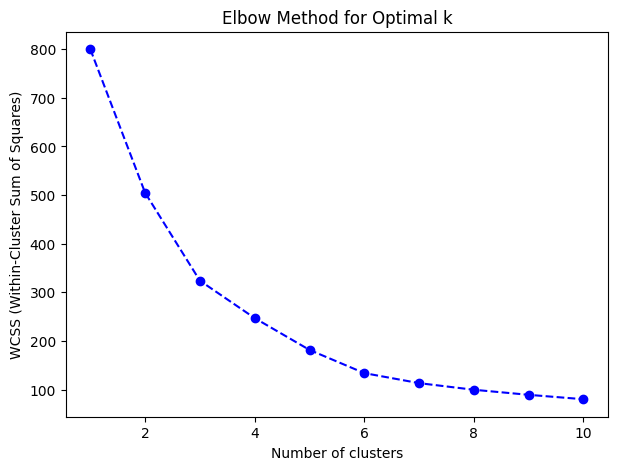

In [5]:
# Plot the Elbow method
plt.figure(figsize=(7, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--',color='blue')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [6]:
# Based on the Elbow method, choose the optimal number of clusters
optimal_k = 3  # Adjust based on the plot


In [7]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
dataset['Cluster'] = kmeans.fit_predict(features_scaled)

In [8]:
# Explore the clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
df_cluster_centers = pd.DataFrame(cluster_centers, columns=['Age', 'EstimatedSalary'])

In [9]:
# Display cluster centers
print("Cluster Centers:")
print(df_cluster_centers)

Cluster Centers:
         Age  EstimatedSalary
0  28.977778     56683.333333
1  46.021583     55784.172662
2  42.580247    122716.049383


In [10]:
# Analyze clusters
cluster_sizes = dataset['Cluster'].value_counts()
print("\nCluster Sizes:")
print(cluster_sizes)


Cluster Sizes:
0    180
1    139
2     81
Name: Cluster, dtype: int64


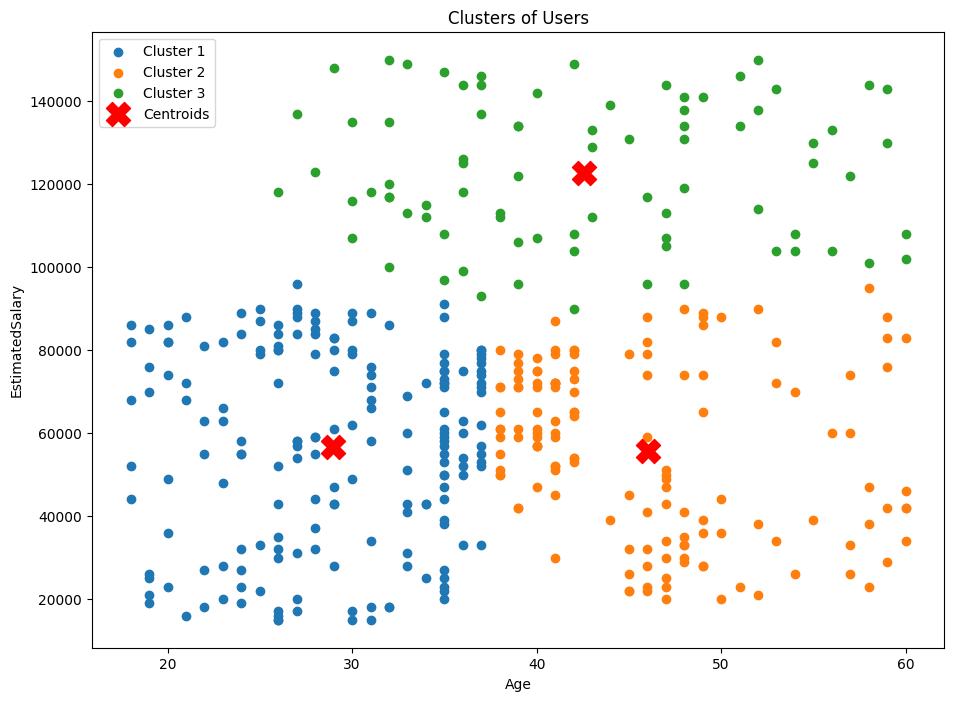

In [11]:
# Visualize the clusters
plt.figure(figsize=(11, 8))
for cluster in range(optimal_k):
    cluster_data = dataset[dataset['Cluster'] == cluster]
    plt.scatter(cluster_data['Age'], cluster_data['EstimatedSalary'], label=f'Cluster {cluster + 1}')

plt.scatter(df_cluster_centers['Age'], df_cluster_centers['EstimatedSalary'], marker='X', color='red', s=300, label='Centroids')
plt.title('Clusters of Users')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.legend()
plt.show()

In [12]:
# Determine the optimal number of clusters using the Silhouette method
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(features_scaled)
    silhouette_avg = silhouette_score(features_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

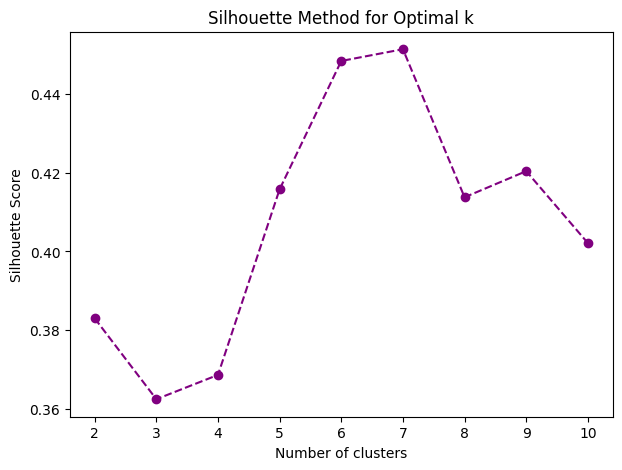

In [13]:
# Plot the Silhouette method
plt.figure(figsize=(7, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='purple')
plt.title('Silhouette Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [14]:

# Use the optimal number of clusters from the Silhouette method
optimal_k_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2

# Apply k-means clustering with the optimal number of clusters from Silhouette method
kmeans_silhouette = KMeans(n_clusters=optimal_k_silhouette, init='k-means++', max_iter=300, n_init=10, random_state=0)
dataset['Cluster_Silhouette'] = kmeans_silhouette.fit_predict(features_scaled)

In [15]:
# Analyze clusters
cluster_sizes_silhouette = dataset['Cluster_Silhouette'].value_counts()
print("\nCluster Sizes (Silhouette Method):")
print(cluster_sizes_silhouette)


Cluster Sizes (Silhouette Method):
0    112
4     71
1     61
2     52
6     41
5     36
3     27
Name: Cluster_Silhouette, dtype: int64


In [16]:
# Demographic analysis within each cluster
cluster_demographics = dataset.groupby('Cluster_Silhouette').agg({'Age': 'mean', 'EstimatedSalary': 'mean', 'Gender': lambda x: x.value_counts().index[0]})
print("\nCluster Demographics:")
print(cluster_demographics)


Cluster Demographics:
                          Age  EstimatedSalary  Gender
Cluster_Silhouette                                    
0                   38.187500     65446.428571    Male
1                   27.901639     28688.524590    Male
2                   50.134615     33634.615385  Female
3                   50.222222    133740.740741  Female
4                   25.478873     74957.746479    Male
5                   52.222222     86777.777778  Female
6                   34.902439    122219.512195  Female


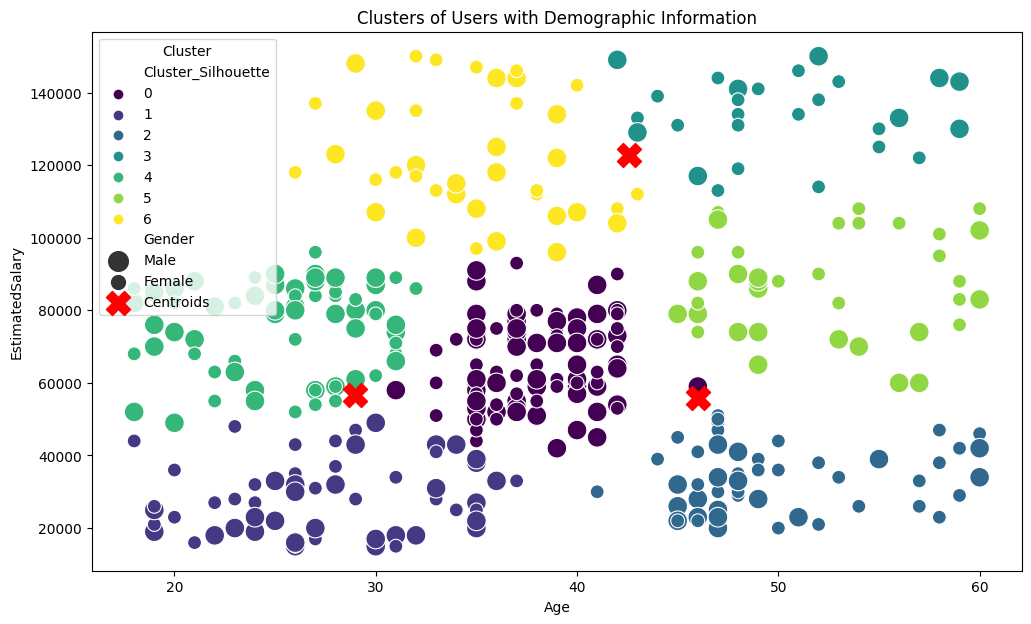

In [17]:
# Visualize the clusters with demographic information
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.scatterplot(data=dataset, x='Age', y='EstimatedSalary', hue='Cluster_Silhouette', palette='viridis', size='Gender', sizes=(100, 200))
plt.scatter(df_cluster_centers['Age'], df_cluster_centers['EstimatedSalary'], marker='X', color='red', s=300, label='Centroids')
plt.title('Clusters of Users with Demographic Information')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.legend(title='Cluster')
plt.show()